## **Customer Shopping Behavior Analysis**

This project explores customer shopping behavior using exploratory data analysis (EDA) and applies a Random Forest model to understand factors influencing subscription status.



## **Importing Required Libraries**

In [2]:
#importing core data analysis and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Loading the Dataset**

In [3]:
#Load the shopping behavior dataset
df = pd.read_csv('shopping_behavior.csv')


## **Initial Data inspection**

In [4]:
#preview the dataset
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#dataset information
df.shape

(3900, 18)

In [ ]:
# summary statistics for numerical values
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
#check for missing values
print("\nMissing Values:\n"), df.isnull().sum()


Missing Values:



(None,
 Customer ID               0
 Age                       0
 Gender                    0
 Item Purchased            0
 Category                  0
 Purchase Amount (USD)     0
 Location                  0
 Size                      0
 Color                     0
 Season                    0
 Review Rating             0
 Subscription Status       0
 Shipping Type             0
 Discount Applied          0
 Promo Code Used           0
 Previous Purchases        0
 Payment Method            0
 Frequency of Purchases    0
 dtype: int64)

## **Age Distribution**

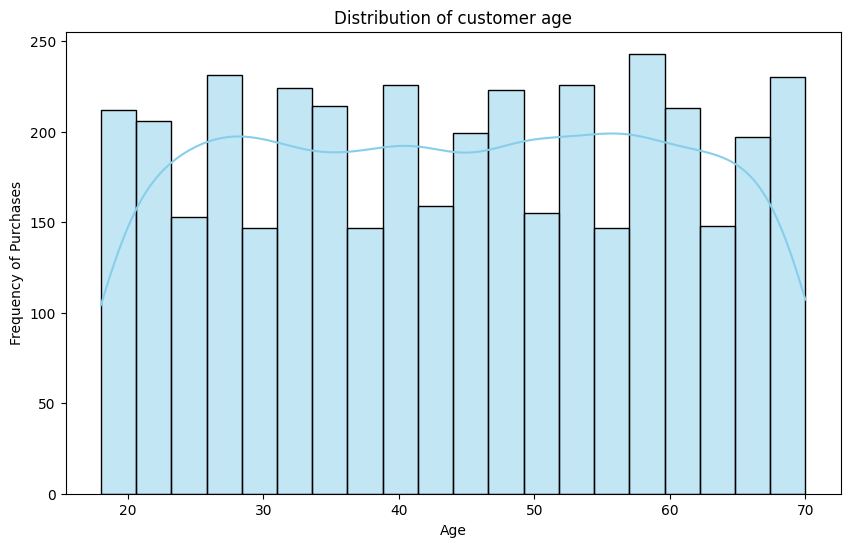

In [ ]:
#plot age distribution
plt.figure(figsize= (10 , 6))
sns.histplot(df['Age'], bins=20, kde= True, color='skyblue' )
plt.title('Distribution of customer age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchases')
plt.show()

## **Purchase Amount by Category**

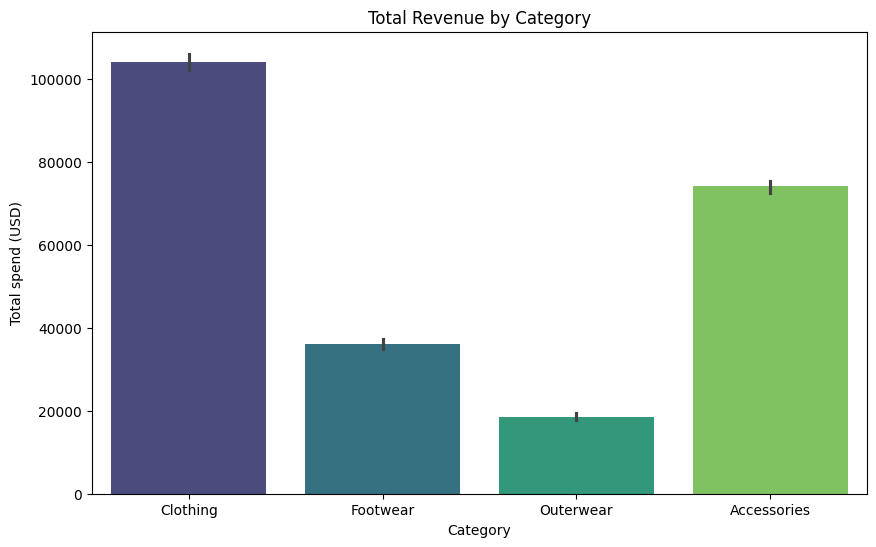

In [ ]:
#Total amount per product category
plt.figure(figsize=(10 , 6))
sns.barplot(x= 'Category' , y = 'Purchase Amount (USD)', data=df,
estimator =sum, palette='viridis', hue='Category', legend=False)
plt.title('Total Revenue by Category')
plt.ylabel('Total spend (USD)')
plt.show()

# **Random Forest Classification**

In [8]:
#import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

## **Data Preparation**

In [9]:
#prepare dataset for modeling
ml_df = df.copy()

In [10]:
le = LabelEncoder()
categorial_cols =['Gender','Category', 'Location','Size','Color','Season',
               'Subscription Status'   ]
for col in categorial_cols:
  ml_df[col]=le.fit_transform(ml_df[col])


**Feature Selection and Target**

In [11]:
#define input features and targe variable
x = ml_df[['Gender','Category', 'Location','Size','Color','Season',
               'Subscription Status'   ]]
y = ml_df['Subscription Status']


## **Train-Test split**

In [12]:
#split data into training and testing sets
X_train , X_test , y_train ,y_test = train_test_split(x, y, test_size = 0.2,
                                                      random_state=42)

## **Model Training and Evaluation **

In [13]:
#Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#predictions
y_pred = model.predict(X_test)



In [14]:
# Evaluate metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



### **Feature Importance Analysis**

In [15]:
#plot feature importance
importances = model.feature_importances_
features = x.columns
indices = np.argsort(importances)

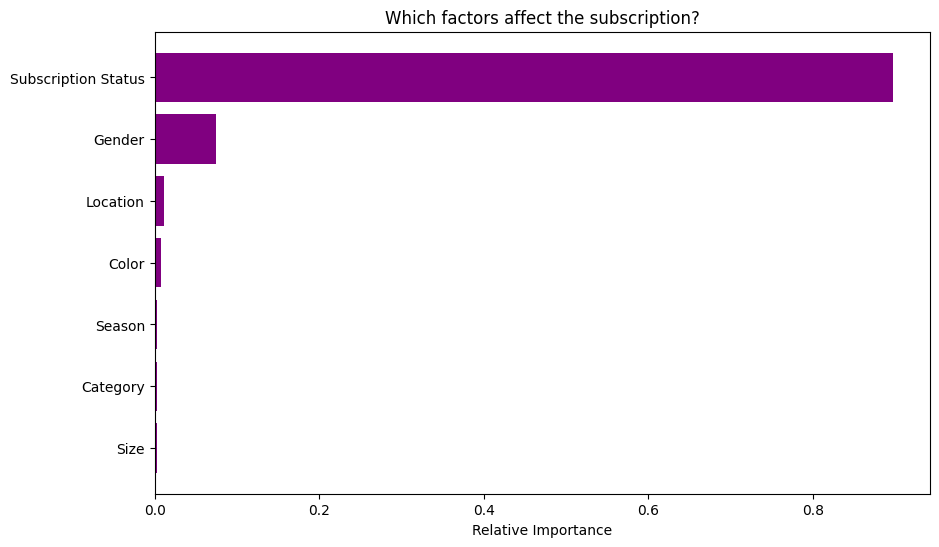

In [16]:
plt.figure(figsize = (10 , 6))
plt.title('Which factors affect the subscription?')
plt.barh(range(len(indices)), importances[indices], color ='purple' , align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Conclusion**

The analysis highlights key customer behavior paterns and indentifies important features influencing subscription decisions using Random forest mode.